<h1 align=center> Bangalore House Price Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./bangalore_housing.csv')
data.head()

,id,Name of the place,BHK,Buildup Area (sq.ft),Price (Cr.)
0,1,"Thirumagondanahalli,Bangalore",2,2032,0.7
1,2,"LIC nivas,Nanja Reddy Colony, Jeevanbheemanaga...",3,1400,1.5
2,3,"Srinagar, Banashankari,Bangalore",2,2000,2.6
3,4,"Kadugodi, Krishnarajapura,Bangalore",3,1000,0.7
4,5,"Yelahanka,Bangalore",5,4000,6.6


In [3]:
data.rename(columns={"Name of the place":"Name_of_the_place",'Buildup Area (sq.ft)':'Buildup_Area_sq.ft', 'Price (Cr.)':'Price_Cr'},inplace=True)

In [4]:
data

,id,Name_of_the_place,BHK,Buildup_Area_sq.ft,Price_Cr
0,1,"Thirumagondanahalli,Bangalore",2,2032,0.70
1,2,"LIC nivas,Nanja Reddy Colony, Jeevanbheemanaga...",3,1400,1.50
2,3,"Srinagar, Banashankari,Bangalore",2,2000,2.60
3,4,"Kadugodi, Krishnarajapura,Bangalore",3,1000,0.70
4,5,"Yelahanka,Bangalore",5,4000,6.60
...,...,...,...,...,...
4015,4016,"Kattigenahalli,Bangalore",2,3000,1.08
4016,4017,"Virgonagar, Aavalahalli,Bangalore",5,2252,0.85
4017,4018,"Yelahanka,Bangalore",5,4000,6.60
4018,4019,"Seeghehalli, Krishnarajapura,Bangalore",7,3600,1.90


In [5]:
data.shape

(4020, 5)

In [6]:
data.isnull().sum()

id                    0
Name_of_the_place     0
BHK                   0
Buildup_Area_sq.ft    0
Price_Cr              0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

id                    4020
Name_of_the_place       55
BHK                      9
Buildup_Area_sq.ft      41
Price_Cr                47
dtype: int64

In [9]:
data.head()

,id,Name_of_the_place,BHK,Buildup_Area_sq.ft,Price_Cr
0,1,"Thirumagondanahalli,Bangalore",2,2032,0.7
1,2,"LIC nivas,Nanja Reddy Colony, Jeevanbheemanaga...",3,1400,1.5
2,3,"Srinagar, Banashankari,Bangalore",2,2000,2.6
3,4,"Kadugodi, Krishnarajapura,Bangalore",3,1000,0.7
4,5,"Yelahanka,Bangalore",5,4000,6.6


In [10]:
data.columns

Index(['id', 'Name_of_the_place', 'BHK', 'Buildup_Area_sq.ft', 'Price_Cr'], dtype='object')

In [11]:
data1 = data.copy()

In [12]:
le = LabelEncoder()

In [13]:
data1["Name_of_the_place"] = le.fit_transform(data1["Name_of_the_place"])

In [14]:
data1

,id,Name_of_the_place,BHK,Buildup_Area_sq.ft,Price_Cr
0,1,49,2,2032,0.70
1,2,28,3,1400,1.50
2,3,47,2,2000,2.60
3,4,26,3,1000,0.70
4,5,53,5,4000,6.60
...,...,...,...,...,...
4015,4016,27,2,3000,1.08
4016,4017,50,5,2252,0.85
4017,4018,53,5,4000,6.60
4018,4019,41,7,3600,1.90


In [15]:
data1.Name_of_the_place.unique()

array([49, 28, 47, 26, 53, 11, 23,  1, 39, 29, 44, 10, 18, 43,  0, 54, 21,
       20, 24, 38, 33,  8, 37, 22,  9, 19, 31, 35, 17, 32,  6, 46, 40,  3,
       48,  4,  7, 16, 52, 42, 12,  2, 14, 45, 27, 50, 36, 34, 30, 15,  5,
       41, 51, 25, 13])

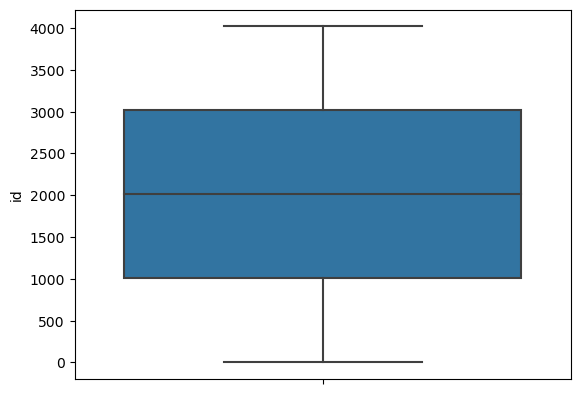

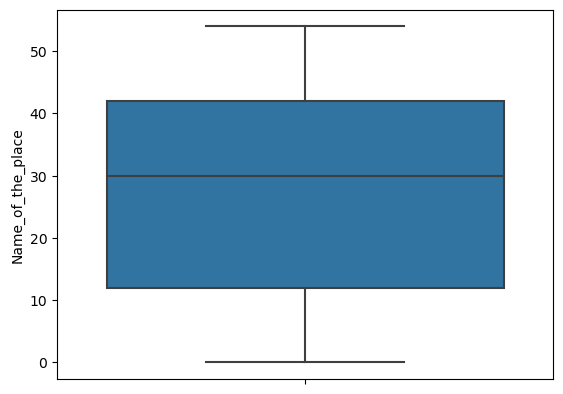

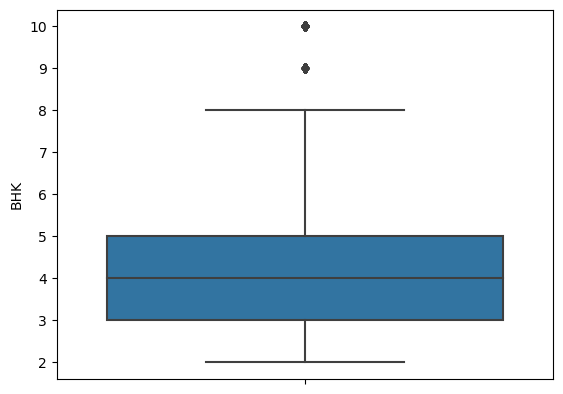

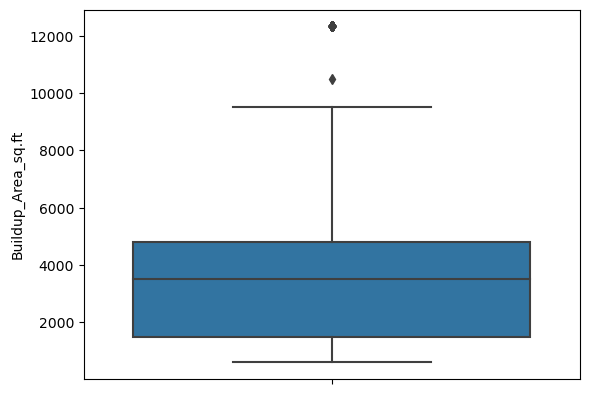

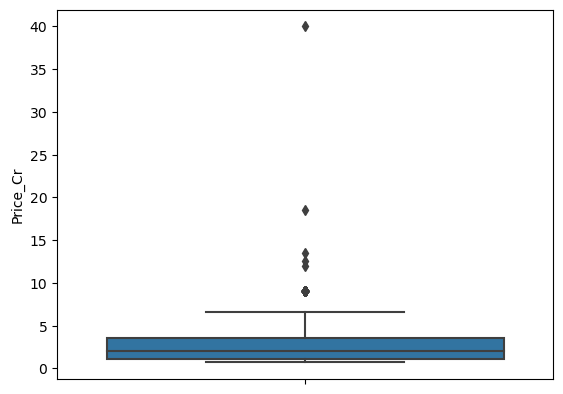

In [16]:
for i in data1.columns:
    sns.boxplot(y=data1[i])
    plt.show()

In [17]:
def outerlimit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [18]:
for i in data1.columns:
    UL,LL = outerlimit(data1[i])
    data1[i] = np.where((data1[i]>UL)|(data1[i]<LL),np.nan,data1[i])

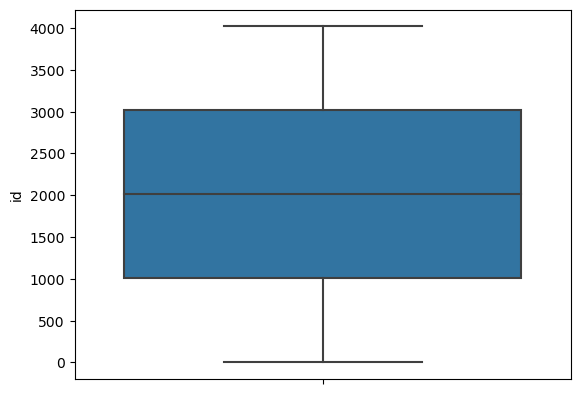

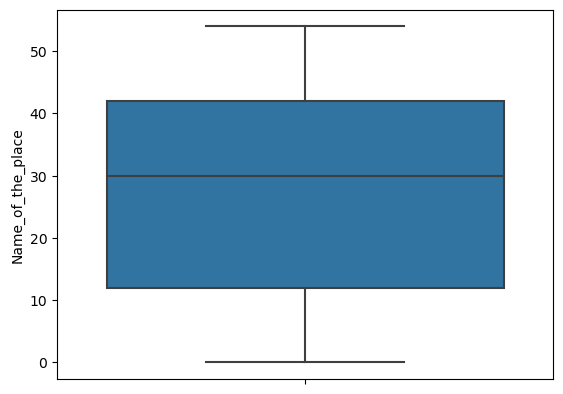

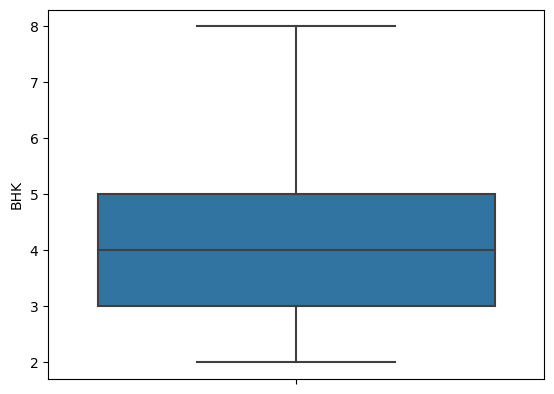

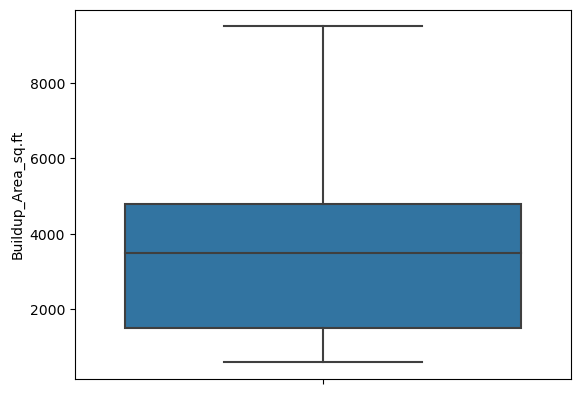

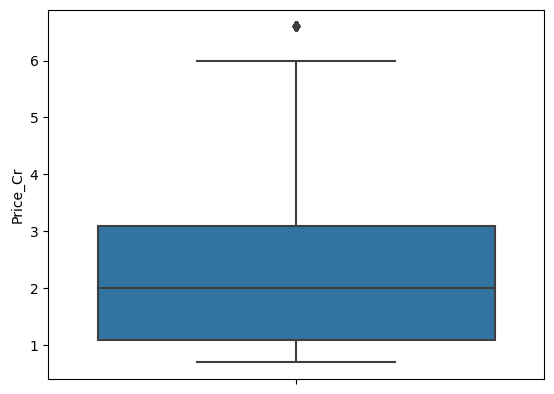

In [19]:
for i in data1.columns:
    sns.boxplot(y=data1[i])
    plt.show()

In [20]:
data1.dropna(inplace=True)

In [21]:
sc = StandardScaler()

In [22]:
x = data1.iloc[:,2:-1].values
y = data1.iloc[:,-1].values

In [23]:
x = sc.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [25]:
models = {"LinearRegression":LinearRegression(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "RandomForestRegressor":RandomForestRegressor(),
          "AdaBoostRegressor":AdaBoostRegressor(),
          "GradientBoostingRegressor":GradientBoostingRegressor(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "LinearSVR":LinearSVR()
    
}

In [26]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=1)
    print("Cross validation model:{}".format(name))
    rmse = np.sqrt(-scores)
    avg_rmse = np.mean(rmse)
    print("Avg rmse:",avg_rmse)
    print("*"*100)

Cross validation model:LinearRegression
Avg rmse: 1.341178130114618
****************************************************************************************************
Cross validation model:Lasso
Avg rmse: 1.6534620585231967
****************************************************************************************************
Cross validation model:Ridge
Avg rmse: 1.341178065637338
****************************************************************************************************
Cross validation model:RandomForestRegressor
Avg rmse: 0.04752482976813012
****************************************************************************************************
Cross validation model:AdaBoostRegressor
Avg rmse: 0.5709449037114868
****************************************************************************************************
Cross validation model:GradientBoostingRegressor
Avg rmse: 0.12469846966054905
****************************************************************************************

#### lower rmse better model and better prediction, so selecting Random Forest Regressor

In [27]:
Model = RandomForestRegressor()

In [28]:
RFR = Model.fit(x_train,y_train)

In [29]:
y_pred = RFR.predict(x_test)

In [30]:
score = r2_score(y_test,y_pred)
print("Score:{}".format(score))

Score:0.9985566938851638


In [31]:
RFR.score(x_test,y_test)

0.9985566938851638

In [32]:
RFR.score(x_train,y_train)

0.997471858469233

In [33]:
Model.score(x_train,y_train)

0.997471858469233

In [34]:
Model.score(x_test,y_test)

0.9985566938851638

In [35]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=["Actual","Prediction"],dtype=float)
Output

,Actual,Prediction
0,3.10,3.100000
1,1.95,1.950000
2,2.75,2.750000
3,1.95,1.950000
4,1.20,1.196386
...,...,...
681,0.75,0.750000
682,3.50,3.500000
683,1.20,1.196386
684,1.10,1.100000


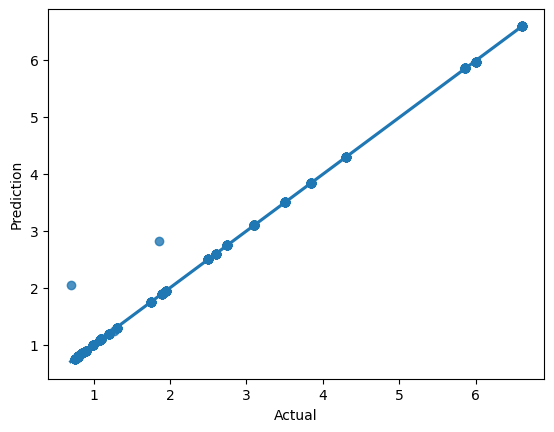

In [36]:
sns.regplot(data=Output,x="Actual",y="Prediction")
plt.show()